In [4]:

import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()
avaliacao = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")

filmes.head()
avaliacao.head()
avaliacao.columns = ("usuarioId", "filmeId", "notaId", "momentoId")

avaliacao.head()
avaliacao.query("filmeId==1")
avaliacao.describe()
avaliaoes_do_filme = avaliacao.groupby("filmeId")["notaId"].mean()
avaliaoes_do_filme.head()

filmes_com_media = filmes.join(avaliaoes_do_filme, on="filmeId")
filmes_com_media.head()
filmes_com_media.sort_values("notaId", ascending=False).head(15)

#avaliacao.query("filmeId==1")["notaId"].plot()

filmes["generos"].str.get_dummies("|").sum()



 

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)



Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

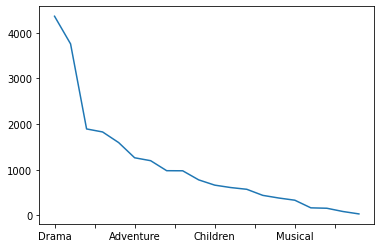

In [3]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()


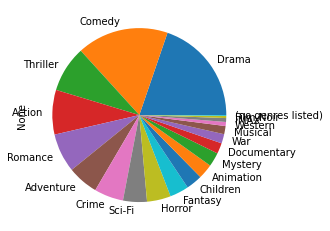

In [4]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind="pie")


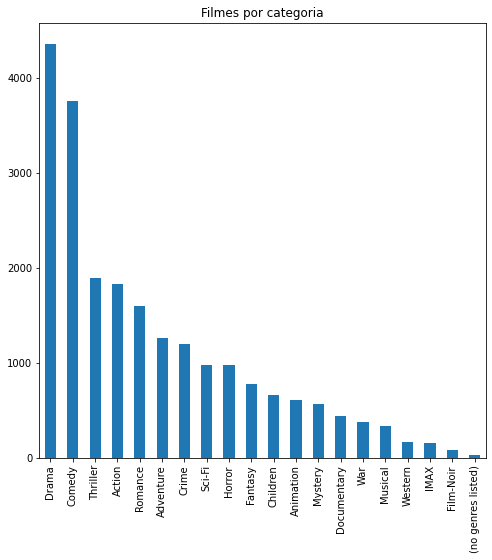

In [5]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))


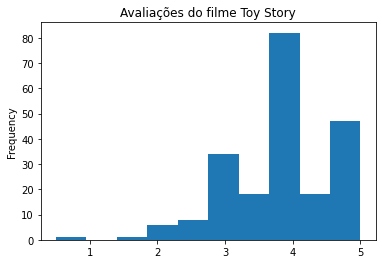

In [12]:

import matplotlib.pyplot as plt

avaliacao.query("filmeId == 1")["notaId"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

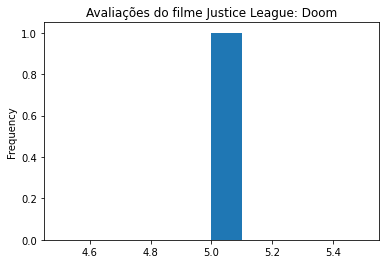

In [16]:
avaliacao.query("filmeId == 102084")["notaId"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

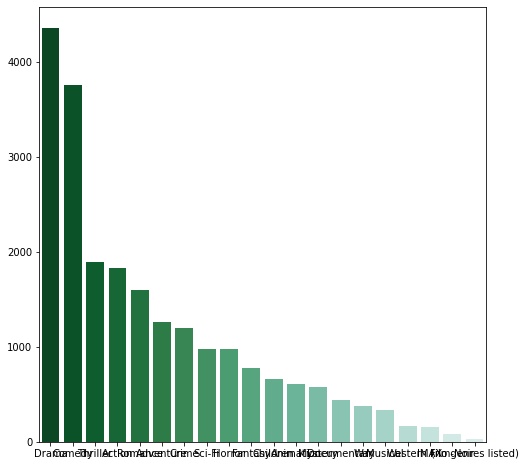

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

In [13]:
filmes_com_media

,filmeId,titulo,generos,notaId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


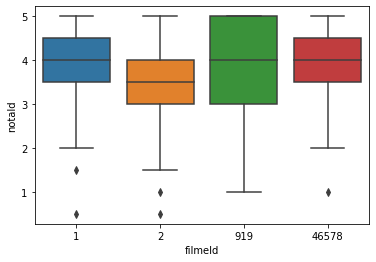

In [15]:
sns.boxplot(data = avaliacao.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="notaId")